In [1]:
import numpy as np

In [2]:
def runge_kutta(a, b, c, A, t_0, t_max, tau, y_0):
    """
    Явные методы Рунге-Кутты для дифференциальных уравнений.
    
    Параметры:
    a - матрица размера sxs
    b, c - векторы размера sx1
    A - матрица A(t), на которую умножается вектор y(t)
    t_0 - левая граница отрезка, на котором решается задача Коши
    t_max - правая граница отрезка, на котором решается задача Коши
    tau - величина шага на итерации
    y_0 - вектор начальных условий y(p) (в этом случае реализовано как значение y(t_0))
    
    Возвращает значения t, y(t) на сетке.
    """
    dim = len(y_0)  # размерность системы
    N = int((t_max - t_0) / tau)  # число шагов
    t = [t_0 + n * tau for n in range(N + 1)]  # сетка
    y = np.array([[0.] * dim for _ in range(N + 1)])  # вектор u(t) в узлах сетки
    y[0] = y_0  # начальное приближение
    s = len(b)  # число стадий
    for n in range(N):
        k = np.zeros((s, dim))
        for i in range(s):
            k[i] = A() @ (y[n] + tau * a[i] @ k)
        y[n + 1] = y[n] + tau * b @ k
    return t, y[:, 0]

In [3]:
a2 = np.array([
    [0, 0],
    [1, 0]
])

a3 = np.array([
    [0, 0, 0],
    [1/3, 0, 0],
    [0, 2/3, 0]
])

a4 = np.array([
    [0, 0, 0, 0],
    [1/2, 0, 0, 0],
    [0, 1/2, 0, 0],
    [0, 0, 1, 0]
])

In [4]:
b2, b3, b4 = np.array([1/2] * 2), np.array([1/4, 0, 3/4]), np.array([1/6, 2/6, 2/6, 1/6])

In [5]:
c2, c3, c4 = np.array([0, 1]), np.array([0, 1/3, 2/3]), np.array([0, 1/2, 1/2, 1])

In [6]:
_2_order = [a2, b2, c2]
_3_order = [a3, b3, c3]
_4_order = [a4, b4, c4]

Протестируем на уравнении 

$$
\dot y = y, \space y(0) = \dot y(0) = 1
$$

In [7]:
def A():
    return np.array([1])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from math import inf
from scipy.optimize import curve_fit
from numpy.linalg import norm

In [10]:
def linear_func(x, k, b):
    return k * x + b

In [11]:
C_norm = pd.DataFrame(
    columns=['ЯМРК {} порядка точности'.format(j + 2) for j in range(3)],
    index = [2**(-i) for i in range(3, 14, 2)]
)

L2_norm = pd.DataFrame(
    columns=['ЯМРК {} порядка точности'.format(j + 2) for j in range(3)],
    index = [2**(-i) for i in range(3, 14, 2)]
)

In [12]:
C_norm.index.name = 'Величина шага'
L2_norm.index.name = 'Величина шага'

### Отрезок $[0, 1]$

In [13]:
for tau in [2**(-i) for i in range(3, 14, 2)]:
    for j, order in enumerate([_2_order, _3_order, _4_order]):
        t, y = runge_kutta(*order, A, 0, 1, tau, np.array([1]))
        C_norm['ЯМРК {} порядка точности'.format(j + 2)][tau] = np.log(norm(y - np.exp(t), inf))
        L2_norm['ЯМРК {} порядка точности'.format(j + 2)][tau] = np.log(norm(y - np.exp(t), 2))

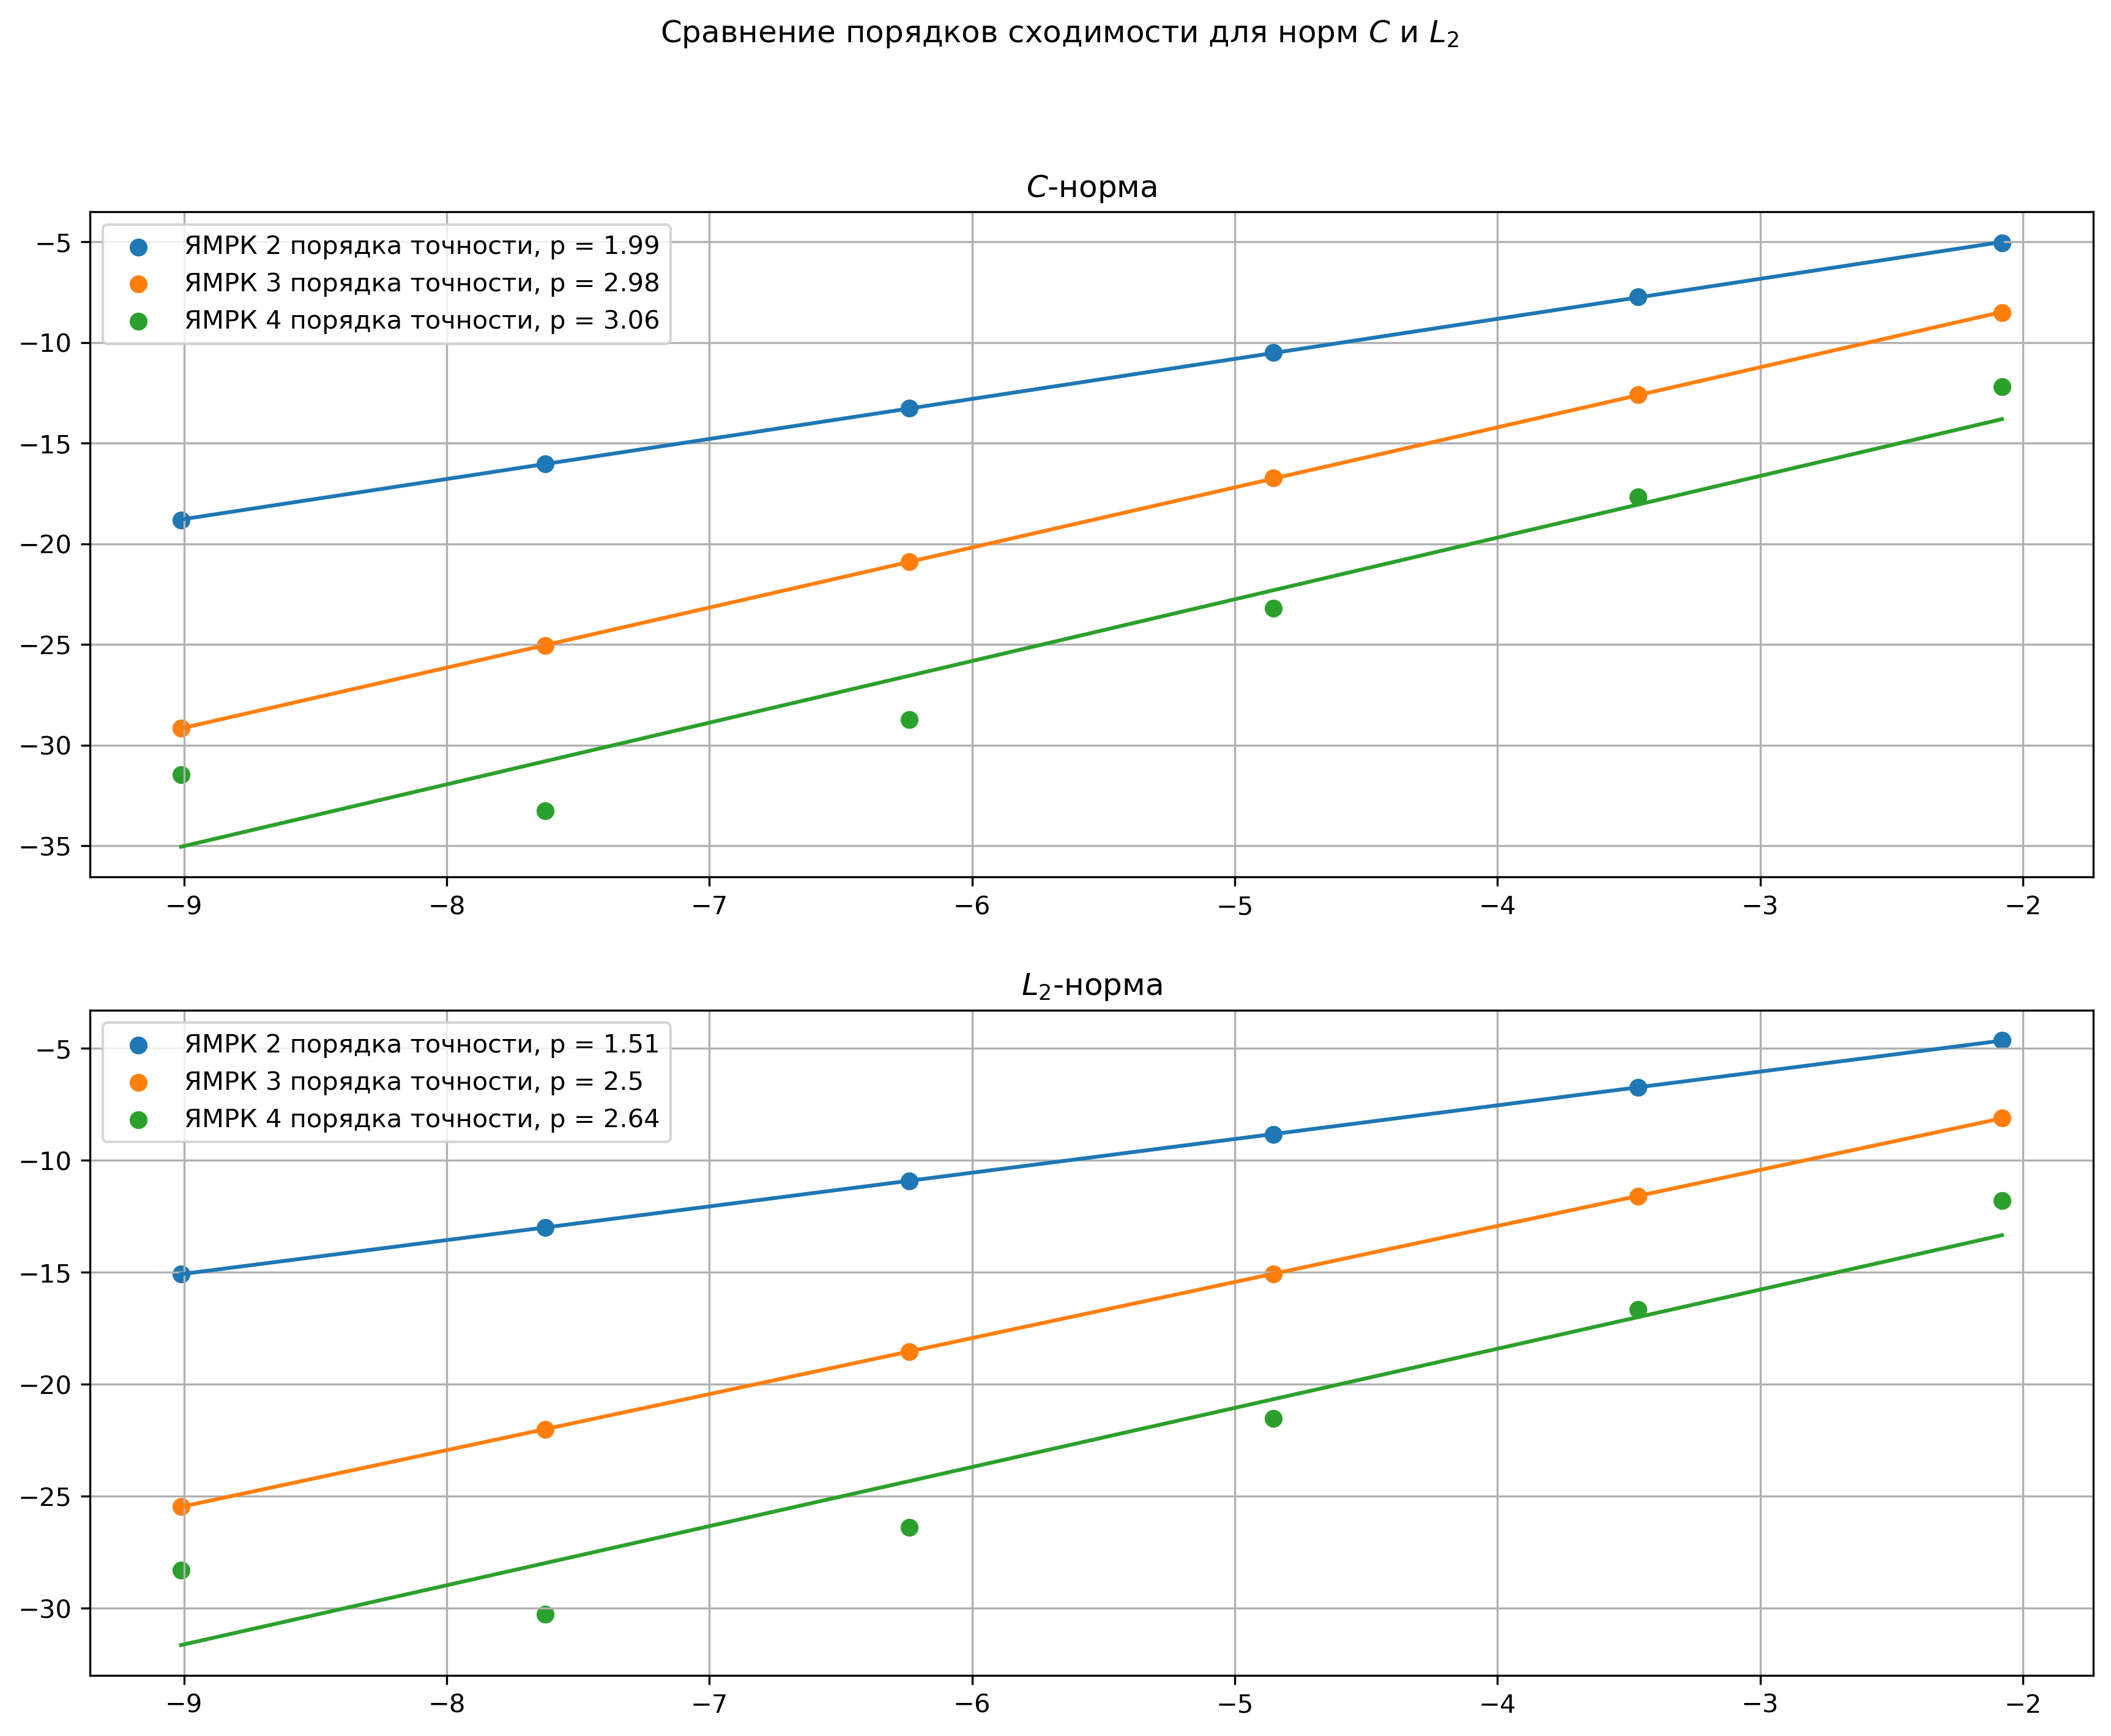

In [14]:
fig, (axC, axL2) = plt.subplots(2)
fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
fig.set_dpi(300)
fig.suptitle(r'Сравнение порядков сходимости для норм $C$ и $L_2$')
for column in C_norm.columns:
    params, _ = curve_fit(
        linear_func,
        np.log(C_norm.index),
        C_norm[column]
    )
    axC.scatter(np.log(C_norm.index), C_norm[column], label=column + ', p = {}'.format(round(params[0], 2)))
    axC.plot(np.log(C_norm.index), linear_func(np.log(C_norm.index), *params))
for column in L2_norm.columns:
    params, _ = curve_fit(
        linear_func,
        np.log(L2_norm.index),
        L2_norm[column]
    )
    axL2.scatter(np.log(L2_norm.index), L2_norm[column], label=column + ', p = {}'.format(round(params[0], 2)))
    axL2.plot(np.log(L2_norm.index), linear_func(np.log(L2_norm.index), *params))
axC.set_title(r'$C$-норма')
axL2.set_title(r'$L_2$-норма')
axC.grid()
axL2.grid()
axC.legend(loc='upper left')
axL2.legend(loc='upper left')

### Отрезок $[0, 10]$

In [15]:
C_norm = pd.DataFrame(
    columns=['ЯМРК {} порядка точности'.format(j + 2) for j in range(3)],
    index = [2**(-i) for i in range(1, 12, 2)]
)

L2_norm = pd.DataFrame(
    columns=['ЯМРК {} порядка точности'.format(j + 2) for j in range(3)],
    index = [2**(-i) for i in range(1, 12, 2)]
)

In [16]:
C_norm.index.name = 'Величина шага'
L2_norm.index.name = 'Величина шага'

In [17]:
for tau in [2**(-i) for i in range(1, 12, 2)]:
    for j, order in enumerate([_2_order, _3_order, _4_order]):
        t, y = runge_kutta(*order, A, 0, 10, tau, np.array([1]))
        C_norm['ЯМРК {} порядка точности'.format(j + 2)][tau] = np.log(norm(y - np.exp(t), inf))
        L2_norm['ЯМРК {} порядка точности'.format(j + 2)][tau] = np.log(norm(y - np.exp(t), 2))

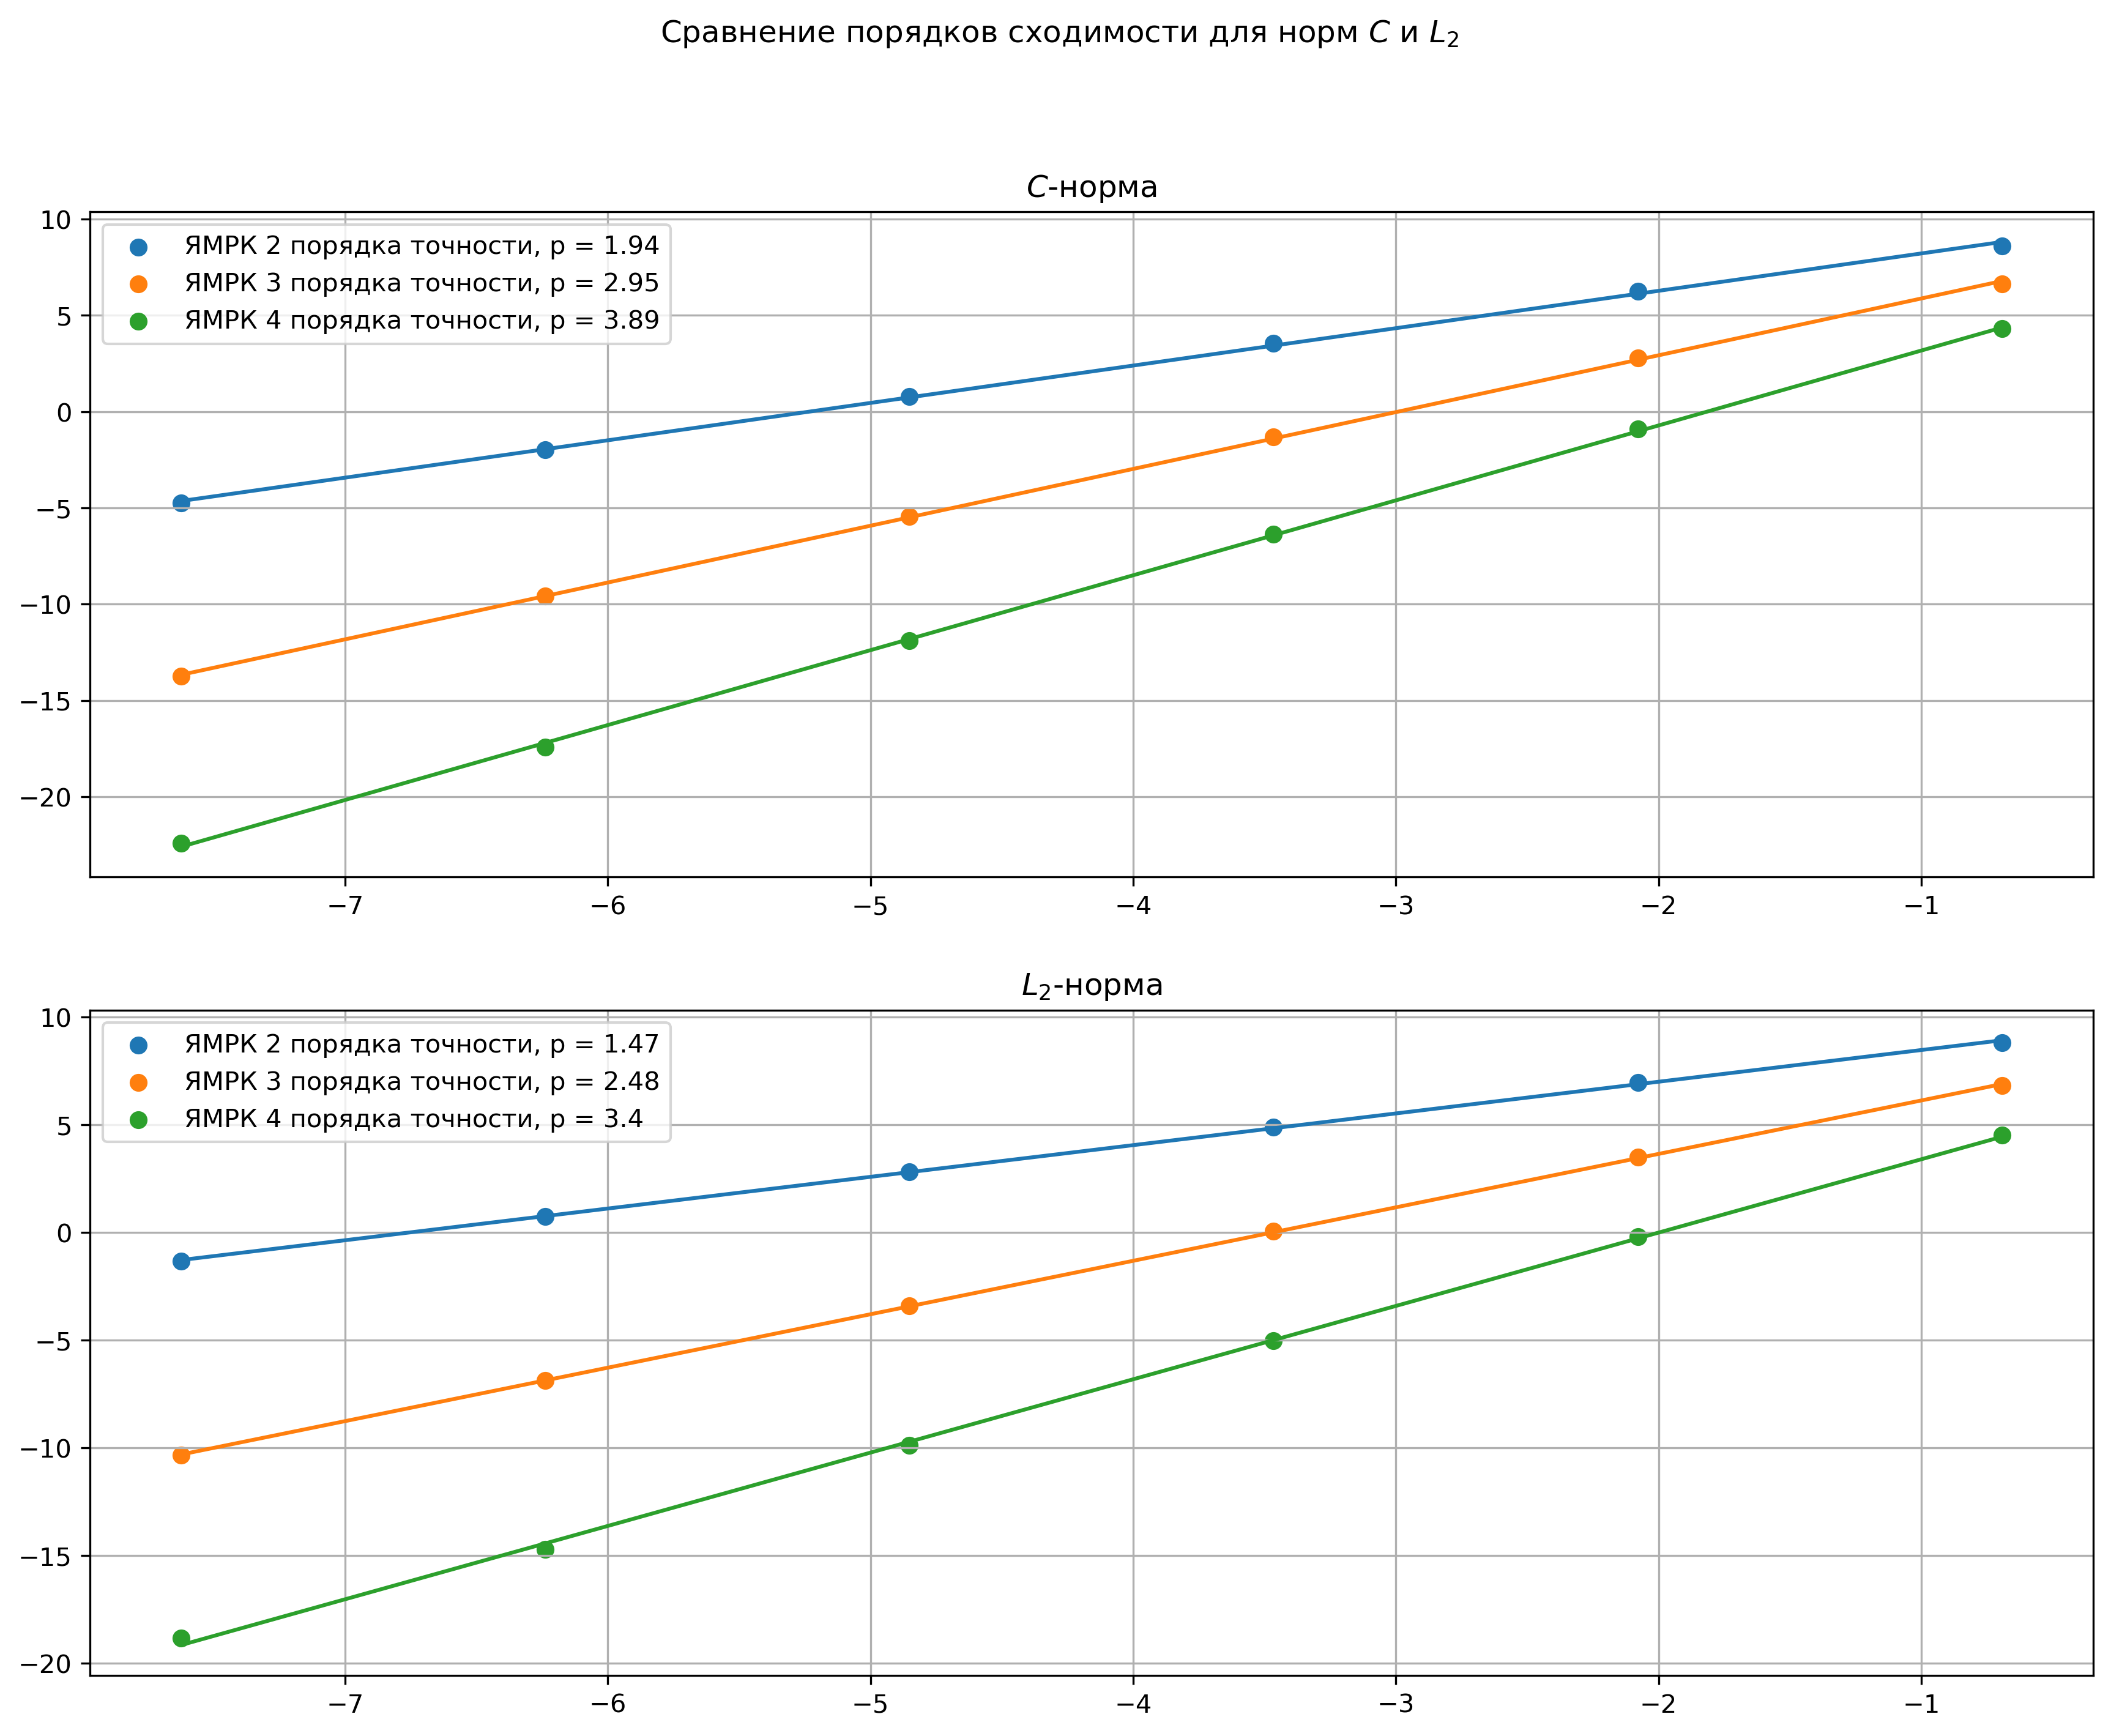

In [18]:
fig, (axC, axL2) = plt.subplots(2)
fig.set_size_inches(6.4 * 2.2, 4.8 * 2.2)
fig.set_dpi(300)
fig.suptitle(r'Сравнение порядков сходимости для норм $C$ и $L_2$')
for column in C_norm.columns:
    params, _ = curve_fit(
        linear_func,
        np.log(C_norm.index),
        C_norm[column]
    )
    axC.scatter(np.log(C_norm.index), C_norm[column], label=column + ', p = {}'.format(round(params[0], 2)))
    axC.plot(np.log(C_norm.index), linear_func(np.log(C_norm.index), *params))
for column in L2_norm.columns:
    params, _ = curve_fit(
        linear_func,
        np.log(L2_norm.index),
        L2_norm[column]
    )
    axL2.scatter(np.log(L2_norm.index), L2_norm[column], label=column + ', p = {}'.format(round(params[0], 2)))
    axL2.plot(np.log(L2_norm.index), linear_func(np.log(L2_norm.index), *params))
axC.set_title(r'$C$-норма')
axL2.set_title(r'$L_2$-норма')
axC.grid()
axL2.grid()
axC.legend(loc='upper left')
axL2.legend(loc='upper left')